# **SCC0277:** Desafio de Regressão

Dikson F. Santos `<dikson@usp.br>`

`(github.com/diksown/barrels-of-insight)`


# Descrição

Utilizando a metodologia básica de um projeto para ciência de dados, implemente possíveis soluções para o seguinte estudo de caso (https://www.kaggle.com/datasets/podsyp/sales-in-craft-beer-bar). Desenvolva e implemente métodos que se propõem a estimar a variável de saída.

Em seu projeto deverá constar uma análise detalhada do dataset e descrição das transformações de dados realizadas com suas respectivas justificativas. Adicionalmente, crie um baseline com as técnicas contidas nesta aula. Como forma de superar este baseline, pesquise por métodos e técnicas mais complexas. Você deverá entregar um relatório com os seguintes itens:

Descrição do problema e análise dos dados
Descrição das técnicas utilizadas
Interpretação dos resultados obtidos
Conclusão
Apêndice (descrição das técnicas de Regressão apresentadas pelos colegas durante os seminários)
Adicionalmente, no relatório coloque a url de seu repositório on-line para consulta. Seu código deve estar comentado!!

Sistema de Avaliação:

- (1,0) Qualidade do relatório
- (1,0) Análise dos dados e descrição do problema
- (3,0) Implementação da solução
- (3,0) Interpretação dos resultados
- (2,0) Resumo das técnicas dos seminários de Regressão


# Introdução


O objetivo desse trabalho é desenvolver um modelo de machine learning para auxiliar na gestão do bar de cerveja Nelson Sauvin. Localizado no centro de Yekaterinburg, o bar se destaca por oferecer uma ampla variedade de cervejas interessantes de cervejarias new wave europeias, americanas e russas. Além disso, o estabelecimento conta com um estoque diversificado de garrafas e uma seleção dos melhores queijos regionais.


# Análise Exploratória de Dados e Pré-processamento


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [44]:
sns.set_theme()

In [45]:
product_range = pd.read_csv("./data/Product_range.csv")
transactions = pd.read_csv("./data/Transactions.csv")

In [46]:
product_range.head(3)

,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
1,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
2,1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6


In [47]:
transactions.head(3)

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69


In [48]:
product_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5314 entries, 0 to 5313
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_code       5314 non-null   int64  
 1   Vendor_code        4288 non-null   object 
 2   Name               5314 non-null   object 
 3   Retail_price       4878 non-null   float64
 4   Base_unit          4910 non-null   object 
 5   Country_of_Origin  4205 non-null   object 
 6   Size               4626 non-null   float64
 7   ABV                4622 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 332.2+ KB


In [49]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50084 entries, 0 to 50083
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_and_time_of_unloading  50084 non-null  object 
 1   Product_code                50084 non-null  int64  
 2   Amount                      50084 non-null  float64
 3   Sale_amount                 50033 non-null  float64
 4   Discount_amount             39882 non-null  float64
 5   Profit                      50070 non-null  float64
 6   Percentage_markup           48145 non-null  float64
 7   Discount_percentage         39882 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.1+ MB


In [50]:
df = pd.merge(transactions, product_range, on="Product_code", how="inner")

In [51]:
df.head(3)

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,2020-01-01 23:00:00,144,1.0,280.0,NaN,155.0,124.0,NaN,AF Brew,AF Brew Zimnjaja Melanholija Coffee + Vanilla ...,280.0,Pieces,Russia,0.33,10.3
1,2020-01-02 01:00:00,144,2.0,500.0,60.0,250.0,100.0,10.71,AF Brew,AF Brew Zimnjaja Melanholija Coffee + Vanilla ...,280.0,Pieces,Russia,0.33,10.3
2,2020-01-03 01:00:00,144,1.0,252.0,28.0,127.0,101.6,10.00,AF Brew,AF Brew Zimnjaja Melanholija Coffee + Vanilla ...,280.0,Pieces,Russia,0.33,10.3


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50084 entries, 0 to 50083
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_and_time_of_unloading  50084 non-null  object 
 1   Product_code                50084 non-null  int64  
 2   Amount                      50084 non-null  float64
 3   Sale_amount                 50033 non-null  float64
 4   Discount_amount             39882 non-null  float64
 5   Profit                      50070 non-null  float64
 6   Percentage_markup           48145 non-null  float64
 7   Discount_percentage         39882 non-null  float64
 8   Vendor_code                 43760 non-null  object 
 9   Name                        50084 non-null  object 
 10  Retail_price                50081 non-null  float64
 11  Base_unit                   50084 non-null  object 
 12  Country_of_Origin           41575 non-null  object 
 13  Size                        442

In [53]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29917 entries, 1 to 50081
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_and_time_of_unloading  29917 non-null  object 
 1   Product_code                29917 non-null  int64  
 2   Amount                      29917 non-null  float64
 3   Sale_amount                 29917 non-null  float64
 4   Discount_amount             29917 non-null  float64
 5   Profit                      29917 non-null  float64
 6   Percentage_markup           29917 non-null  float64
 7   Discount_percentage         29917 non-null  float64
 8   Vendor_code                 29917 non-null  object 
 9   Name                        29917 non-null  object 
 10  Retail_price                29917 non-null  float64
 11  Base_unit                   29917 non-null  object 
 12  Country_of_Origin           29917 non-null  object 
 13  Size                        29917 no

In [54]:
def show_graph(col_name, description):
    category_count = df[col_name].value_counts().head(5)
    counts = category_count
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.values, y=counts.index)
    plt.title(description)
    plt.xlabel("Frequência")
    plt.ylabel(None)
    plt.show()

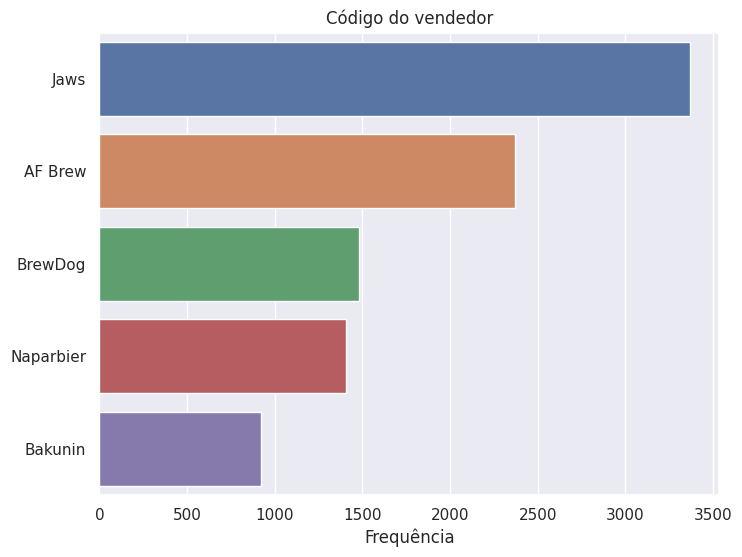

In [55]:
show_graph("Vendor_code", "Código do vendedor")

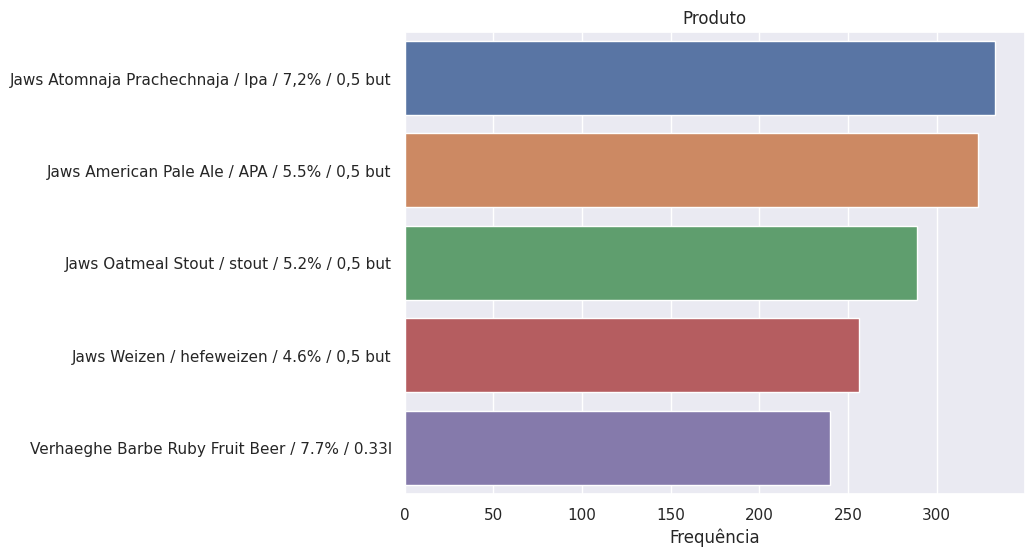

In [56]:
show_graph("Name", "Produto")

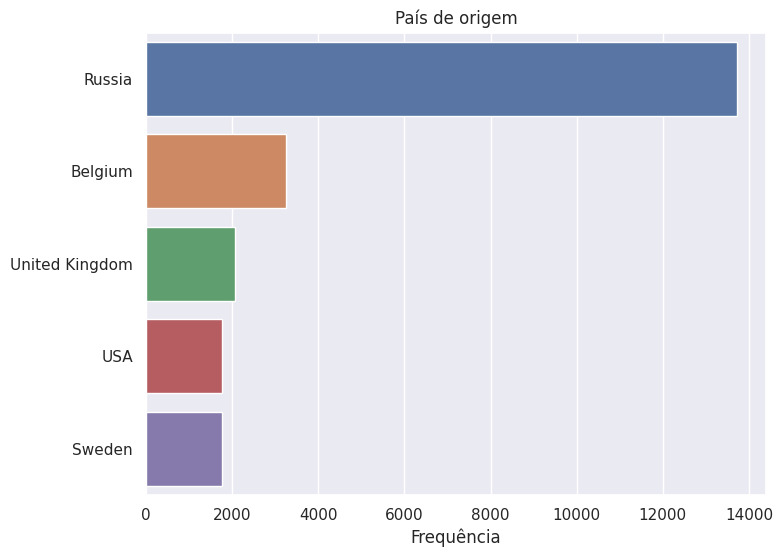

In [57]:
show_graph("Country_of_Origin", "País de origem")

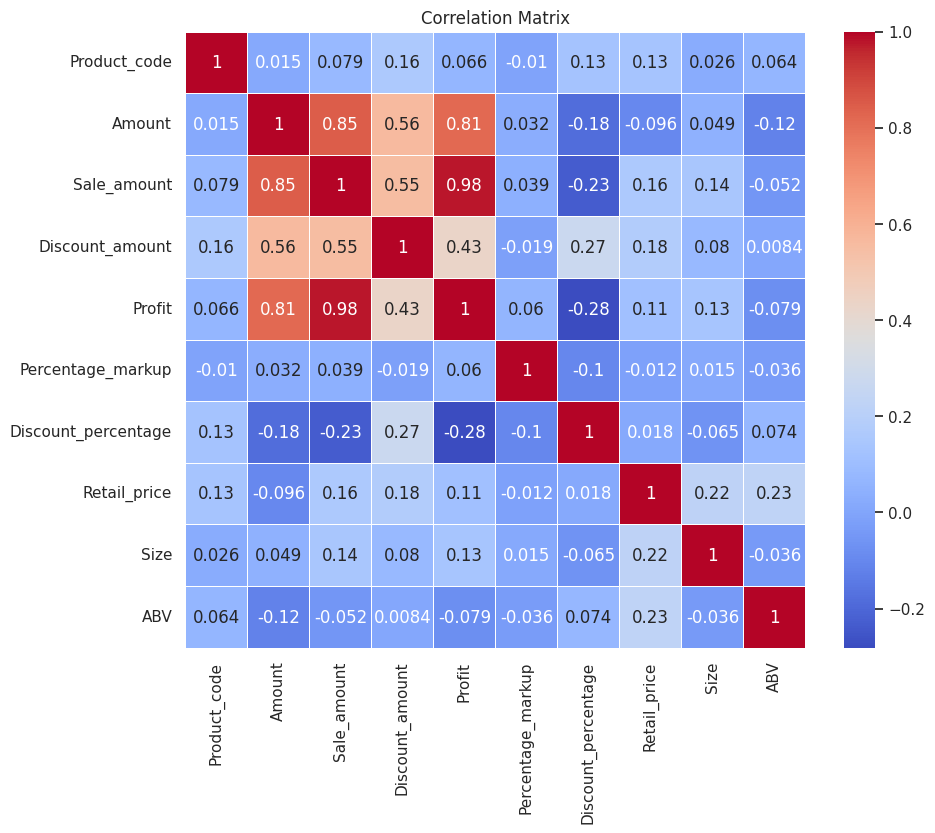

In [58]:
# Check the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
# print(correlation_matrix)
# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Treinamento do Modelo


In [86]:
def evaluate_regressor(regressor):
    numeric_columns = df.select_dtypes(include=[np.number])
    to_predict = "Sale_amount"
    x, y = numeric_columns.drop(to_predict, axis=1), numeric_columns[to_predict]
    scores = cross_validate(
        regressor,
        x,
        y,
        cv=5,
        scoring=("neg_mean_squared_error", "r2"),
    )
    mse = -scores["test_neg_mean_squared_error"].mean()
    r2 = scores["test_r2"].mean()
    print(f"Running cross-validation for {regressor.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.0f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"--")

In [87]:
# Regressão Linear
evaluate_regressor(LinearRegression())

# Decision Tree
evaluate_regressor(DecisionTreeRegressor(max_depth=5))

# Random Forest
evaluate_regressor(RandomForestRegressor(n_estimators=50, max_depth=5))

# AdaBoost
evaluate_regressor(AdaBoostRegressor(n_estimators=50))

Running cross-validation for LinearRegression
Mean Squared Error: 174350
R2 Score: 0.9762
--
Running cross-validation for DecisionTreeRegressor
Mean Squared Error: 214077
R2 Score: 0.9708
--
Running cross-validation for RandomForestRegressor
Mean Squared Error: 141628
R2 Score: 0.9805
--
Running cross-validation for AdaBoostRegressor
Mean Squared Error: 864316
R2 Score: 0.8723
--
